In [2]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set(style="whitegrid")
RANDOM_SEED = 42


In [3]:
boston = fetch_openml(name="Boston", as_frame=True) 
df = boston.frame.copy()
df.head()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
corr_matrix = df.corr()
corr_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [8]:
corr_with_medv = corr_matrix['MEDV'].sort_values(ascending=False)
print(corr_with_medv)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [9]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
mlp = MLPRegressor(
    hidden_layer_sizes=(200,20,10),  
    activation='relu',
    solver='adam',
    max_iter=3000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R2: {r2:.3f}")

MSE: 18.808, R2: 0.744


In [25]:
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


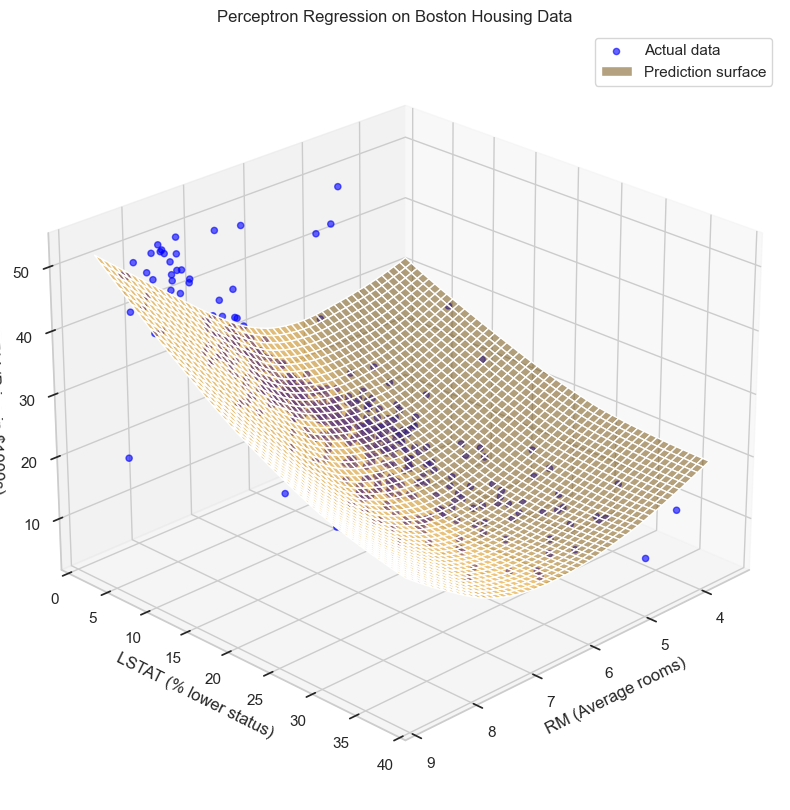

In [32]:
# ایجاد شبکه‌ای از نقاط برای رسم سطح
rm_min, rm_max = X[:, 0].min(), X[:, 0].max()
lstat_min, lstat_max = X[:, 1].min(), X[:, 1].max()

rm_grid = np.linspace(rm_min, rm_max, 50)
lstat_grid = np.linspace(lstat_min, lstat_max, 50)
RM, LSTAT = np.meshgrid(rm_grid, lstat_grid)

# تبدیل به بردار دو ستونه برای پیش‌بینی
grid_points = np.column_stack([RM.ravel(), LSTAT.ravel()])
grid_scaled = scaler.transform(grid_points)
grid_pred = mlp.predict(grid_scaled)
Z = grid_pred.reshape(RM.shape)

# رسم نمودار سه‌بعدی
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')

# نقاط واقعی
ax.scatter(X[:,0], X[:,1], y, color='blue', alpha=0.6, label='Actual data')

# صفحه‌ی پیش‌بینی مدل
ax.plot_surface(RM, LSTAT, Z, color='orange', alpha=0.5, label='Prediction surface')

ax.set_xlabel('RM (Average rooms)')
ax.set_ylabel('LSTAT (% lower status)')
ax.set_zlabel('MEDV (Price in $1000s)')
ax.set_title('Perceptron Regression on Boston Housing Data')
ax.view_init(elev=25, azim=45)

plt.legend()
plt.show()
